In [6]:
import numpy as np
import pandas as pd
pd.pandas.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
from sklearn.feature_selection import VarianceThreshold

In [3]:
# reading datasets(2021 ~ 2023)

dataset_2023 = pyreadr.read_r('datasets/NSDUH_2023.Rdata')
dataset_2022 = pyreadr.read_r('datasets/NSDUH_2022.Rdata')
# dataset_2021 = pyreadr.read_r('datasets/NSDUH_2021.Rdata')

print (dataset_2023.keys())
print (dataset_2022.keys())
# print (dataset_2021.keys())

odict_keys(['.Random.seed', 'puf2023_102124'])
odict_keys(['.Random.seed', 'puf2022_110424'])


In [4]:
get_data_2023 = dataset_2023["puf2023_102124"]
get_data_2022 = dataset_2022["puf2022_110424"]
get_data_2022

QUESTID2    FILEDATE     ANALWT2_C  VESTR_C  VEREP  PDEN10  COUTYP4  \
0      10000330.0  11/04/2024    298.004021  40030.0    2.0     1.0      1.0   
1      10000425.0  11/04/2024   2292.377696  40002.0    1.0     2.0      2.0   
2      10002771.0  11/04/2024    216.604339  40041.0    2.0     1.0      1.0   
3      10005250.0  11/04/2024  13828.218374  40012.0    2.0     2.0      1.0   
4      10005432.0  11/04/2024   6282.612060  40037.0    1.0     2.0      2.0   
...           ...         ...           ...      ...    ...     ...      ...   
59064  52157872.0  11/04/2024   1984.594036  40006.0    2.0     1.0      1.0   
59065  52159889.0  11/04/2024   2132.331321  40014.0    1.0     2.0      2.0   
59066  52160488.0  11/04/2024  13571.894365  40049.0    2.0     1.0      1.0   
59067  52160671.0  11/04/2024   3884.414286  40043.0    1.0     2.0      3.0   
59068  52161397.0  11/04/2024   2236.656434  40035.0    2.0     2.0      3.0   

       MAIIN102  AIIND102  AGE3  NOMARR2  SERVICE  MILSTAT  ACTDEVER  \
0           2.0       2.0   6.0      1.0      2.0     99.0      99.0   
1           2.0       2.0   9.0     99.0      2.0     99.0      99.0   
2           2.0       2.0   6.0      1.0      2.0     99.0      99.0   
3           2.0       2.0   7.0      1.0      2.0     99.0      99.0   
4           2.0       2.0  10.0      1.0      2.0     99.0      99.0   
...         ...       ...   ...      ...      ...      ...       ...   
59064       2.0       2.0   1.0     99.0     99.0     99.0      99.0   
59065       2.0       2.0  10.0      2.0      2.0     99.0      99.0   
59066       2.0       2.0   8.0     99.0      2.0     99.0      99.0   
59067       2.0       2.0   7.0     99.0      2.0     99.0      99.0   
59068       2.0       2.0   5.0     99.0      2.0     99.0      99.0   

       ACTD2001  ACTD9001  ACTD7590  ACTDVIET  ACTDPRIV  COMBATPY  HEALTH  \
0          99.0      99.0      99.0      99.0      99.0      99.0     1.0   
1          99.0      99.0      99.0      99.0      99.0      99.0     3.0   
2          99.0      99.0      99.0      99.0      99.0      99.0     3.0   
3          99.0      99.0      99.0      99.0      99.0      99.0     1.0   
4          99.0      99.0      99.0      99.0      99.0      99.0     2.0   
...         ...       ...       ...       ...       ...       ...     ...   
59064      99.0      99.0      99.0      99.0      99.0      99.0     4.0   
59065      99.0      99.0      99.0      99.0      99.0      99.0     3.0   
59066      99.0      99.0      99.0      99.0      99.0      99.0     2.0   
59067      99.0      99.0      99.0      99.0      99.0      99.0     2.0   
59068      99.0      99.0      99.0      99.0      99.0      99.0     2.0   

       MOVSINPYR2  SEXATRACT  SEXIDENT  SPEAKENGL  LVLDIFSEE2  LVLDIFHEAR2  \
0             1.0        1.0       1.0        3.0         3.0          3.0   
1             0.0        2.0       1.0        1.0         1.0          1.0   
2             0.0        1.0       1.0        1.0         2.0          1.0   
3             0.0        1.0       1.0        2.0         3.0          3.0   
4             0.0        1.0       1.0        1.0         1.0          1.0   
...           ...        ...       ...        ...         ...          ...   
59064         1.0       99.0      99.0        1.0         2.0          1.0   
59065         0.0        1.0       1.0        1.0         1.0          1.0   
59066         0.0        1.0       1.0        1.0         1.0          1.0   
59067         0.0        5.0       2.0        1.0         1.0          1.0   
59068         1.0        2.0       3.0        1.0         1.0          1.0   

       LVLDIFWALK2  LVLDIFMEM2  LVLDIFCARE2  LVLDIFCOMM2  IRSEX  IRMARIT  \
0              3.0         3.0          3.0          3.0    1.0      1.0   
1              1.0         1.0          1.0          1.0    2.0      4.0   
2              1.0         1.0          1.0          1.0    2.0      1.0   
3              3.

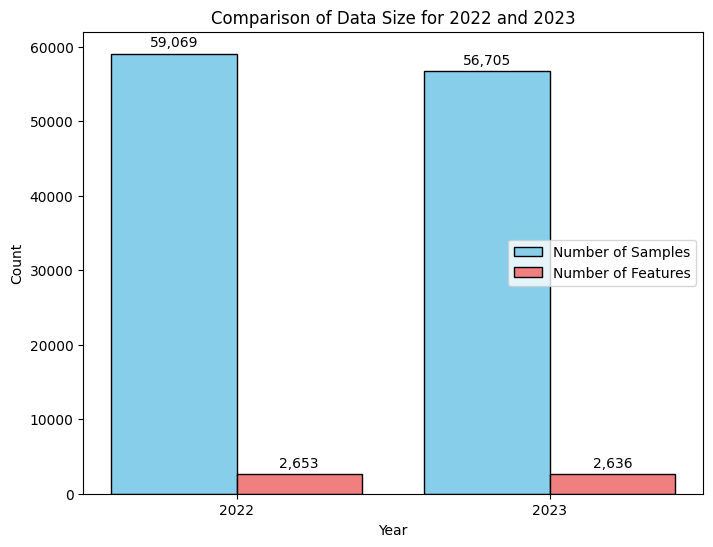

In [5]:
# data for 2022 and 2023
years = ['2022', '2023']
samples = [get_data_2022.shape[0], get_data_2023.shape[0]]  # Number of samples
features = [get_data_2022.shape[1], get_data_2023.shape[1]]  # Number of features

# Set bar width
bar_width = 0.4
x = np.arange(len(years))  # Positions for bars

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - bar_width/2, samples, bar_width, label='Number of Samples', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + bar_width/2, features, bar_width, label='Number of Features', color='lightcoral', edgecolor='black')

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Comparison of Data Size for 2022 and 2023')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:,}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points", ha='center', fontsize=10)

# Show plot
plt.show()


In [17]:
# dropping known unnecessary features 

# unnecess_feat = get_data_2023.iloc[:, :13] 
# unnecess_feat

# removing the first 4 cols and GQTYPE2 col(it's useless categorical variable)
drop_unnecess_feat = get_data_2023.drop(['GQTYPE2'], axis=1)
after_drop_unnecee_feat = drop_unnecess_feat.iloc[:, 9:]
after_drop_unnecee_feat


AGE3  SERVICE  MILSTAT  ACTDEVER  ACTD2001  ACTD9001  ACTD7590  \
0      10.0      2.0     99.0      99.0      99.0      99.0      99.0   
1       9.0      1.0      3.0       1.0       1.0       2.0       2.0   
2       9.0      2.0     99.0      99.0      99.0      99.0      99.0   
3       1.0     99.0     99.0      99.0      99.0      99.0      99.0   
4      10.0      2.0     99.0      99.0      99.0      99.0      99.0   
...     ...      ...      ...       ...       ...       ...       ...   
56700   9.0      2.0     99.0      99.0      99.0      99.0      99.0   
56701  11.0      2.0     99.0      99.0      99.0      99.0      99.0   
56702  10.0      2.0     99.0      99.0      99.0      99.0      99.0   
56703  11.0      1.0      3.0       1.0       2.0       2.0       2.0   
56704   3.0      2.0     99.0      99.0      99.0      99.0      99.0   

       ACTDVIET  ACTDPRIV  COMBATPY  NOMARR2  HEALTH  MOVSINPYR2  SEXATRACT2  \
0          99.0      99.0      99.0      1.0     2.0         0.0         1.0   
1           2.0       2.0       2.0     99.0     2.0         0.0         2.0   
2          99.0      99.0      99.0      2.0     3.0         0.0         2.0   
3          99.0      99.0      99.0     99.0     3.0         0.0         1.0   
4          99.0      99.0      99.0      1.0     1.0         0.0         1.0   
...         ...       ...       ...      ...     ...         ...         ...   
56700      99.0      99.0      99.0     99.0     4.0         0.0        98.0   
56701      99.0      99.0      99.0      1.0     2.0         0.0         1.0   
56702      99.0      99.0      99.0     99.0     2.0         0.0         1.0   
56703       1.0       2.0       2.0      1.0     2.0         0.0         1.0   
56704      99.0      99.0      99.0     99.0     3.0         2.0         6.0   

       SEXIDENT22  SPEAKENGL  LVLDIFSEE2  LVLDIFHEAR2  LVLDIFWALK2  \
0             1.0        1.0         1.0          1.0          1.0   
1             3.0        1.0         1.0          1.0          1.0   
2             1.0        1.0         2.0          3.0          1.0   
3             1.0        1.0         1.0          1.0          1.0   
4             1.0        1.0         1.0          1.0          1.0   
...           ...        ...         ...          ...          ...   
56700        98.0       98.0        98.0         98.0         98.0   
56701         1.0        1.0         1.0          1.0          1.0   
56702         1.0        1.0         2.0          1.0          1.0   
56703         1.0        1.0         1.0          1.0          1.0   
56704         6.0        3.0         3.0          3.0          3.0   

       LVLDIFMEM2  LVLDIFCARE2  LVLDIFCOMM2  IRSEX  IRMARIT  IIMARIT  \
0             1.0          1.0          1.0    1.0      1.0      1.0   
1             2.0          1.0          1.0    1.0      4.0      1.0   
2             2.0          1.0          1.0    2.0      1.0      1.0   
3             1.0          1.0          1.0    1.0     99.0      9.0   
4             1.0          1.0          1.0    1.0      1.0      1.0   
...           ...          ...          ...    ...      ...      ...   
56700        98.0         98.0         98.0    2.0      4.0      1.0   
56701         1.0          1.0          1.0    2.0      1.0      1.0   
56702         1.0          1.0          1.0    2.0      4.0      1.0   
56703         1.0          1.0          1.0    1.0      1.0      1.0   
56704         3.0          3.0          3.0    2.0      4.0      1.0   

       IREDUHIGHST2  IIEDUHIGHST2  CATAGE  CATAG2  CATAG3  CATAG6  CATAG7  \
0               9.0           1.0     4.0     3.0     5.0     5.0     7.0   
1               8.0           1.0     4.0     3.0     4.0     4.0     7.0   
2               8.0           1.0     4.0     3.0     4.0     4.0     7.0   
3               2.0           1.0     1.0     1.0     1.0     1.0     1.0   
4              11.0           1.0     4.0     3.0     5.0     5.0     7.0   
.

In [67]:
# visualizing the low variance features

# applying VarianceThreshold to filter low-variance features (threshold=0.8)
selector = VarianceThreshold(threshold=0.01)
selector.fit(after_drop_unnecee_feat)

# get boolean mask of retained features
selected_features_mask = selector.get_support()

# get the names of low-variance features
low_variance_features = after_drop_unnecee_feat.columns[~selected_features_mask]

print("Features with low variance (threshold=0.01):")
print(low_variance_features.tolist())

/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Features with low variance (threshold=0.01):
['IIEDUHIGHST2', 'DRVINDROTMJ', 'PAROL', 'EIBINGAGE', 'EIBINGYFU', 'EIBINGMFU', 'UADSCHL', 'UADBUND', 'CADRKCOCN2', 'CADRKHERN2', 'CADRKHALL2', 'CADRKINHL2', 'CADRKMETH2', 'FENTANYYR', 'FENTNMYR', 'SVBZOANYYR', 'SVBZONMYR', 'IIPIPLF', 'IICOCRC', 'IICRKRC', 'II2CRKRC', 'IIHERRC', 'II2HERRC', 'IILSDRC', 'IIPCPRC', 'II2PCPRC', 'IIECSTMOREC', 'IIKETMINREC', 'IIDAMTFXREC', 'IRFENTANYYR', 'IRFENTNMYR', 'PIPMON', 'MJPLLYR', 'MJOTHYR', 'MJMTHMON', 'MJSKNMON', 'MJPLLMON', 'COCMON', 'CRKYR', 'CRKMON', 'HERYR', 'HERMON', 'LSDYR', 'LSDMON', 'PCPYR', 'PCPMON', 'ECSTMOYR', 'ECSTMOMON', 'DAMTFXYR', 'DAMTFXMON', 'KETMINYR', 'KETMINMON', 'SALVIAYR', 'SALVIAMON', 'INHALMON', 'METHAMYR', 'METHAMMON', 'PNRNMMON', 'OXYCNNMYR', 'TRQNMMON', 'STMNMMON', 'SEDNMYR', 'SEDNMMON', 'TQSDNMMON', 'OPINMMON', 'CLEFLUEVER', 'ETHEREVER', 'SOLVENEVER', 'LGASEVER', 'SPAINTEVER', 'OTHAEREVER', 'RXZOHYANY', 'RXOXYMANY', 'RXDEMEANY', 'RXHYDMANY', 'RXMTDNANY', 'RXSOMAANY', 'RXANORA

In [71]:
print(len(low_variance_features))

210


In [74]:
low_variance_features_list = low_variance_features.to_list()
low_variance_features_list

['IIEDUHIGHST2',
 'DRVINDROTMJ',
 'PAROL',
 'EIBINGAGE',
 'EIBINGYFU',
 'EIBINGMFU',
 'UADSCHL',
 'UADBUND',
 'CADRKCOCN2',
 'CADRKHERN2',
 'CADRKHALL2',
 'CADRKINHL2',
 'CADRKMETH2',
 'FENTANYYR',
 'FENTNMYR',
 'SVBZOANYYR',
 'SVBZONMYR',
 'IIPIPLF',
 'IICOCRC',
 'IICRKRC',
 'II2CRKRC',
 'IIHERRC',
 'II2HERRC',
 'IILSDRC',
 'IIPCPRC',
 'II2PCPRC',
 'IIECSTMOREC',
 'IIKETMINREC',
 'IIDAMTFXREC',
 'IRFENTANYYR',
 'IRFENTNMYR',
 'PIPMON',
 'MJPLLYR',
 'MJOTHYR',
 'MJMTHMON',
 'MJSKNMON',
 'MJPLLMON',
 'COCMON',
 'CRKYR',
 'CRKMON',
 'HERYR',
 'HERMON',
 'LSDYR',
 'LSDMON',
 'PCPYR',
 'PCPMON',
 'ECSTMOYR',
 'ECSTMOMON',
 'DAMTFXYR',
 'DAMTFXMON',
 'KETMINYR',
 'KETMINMON',
 'SALVIAYR',
 'SALVIAMON',
 'INHALMON',
 'METHAMYR',
 'METHAMMON',
 'PNRNMMON',
 'OXYCNNMYR',
 'TRQNMMON',
 'STMNMMON',
 'SEDNMYR',
 'SEDNMMON',
 'TQSDNMMON',
 'OPINMMON',
 'CLEFLUEVER',
 'ETHEREVER',
 'SOLVENEVER',
 'LGASEVER',
 'SPAINTEVER',
 'OTHAEREVER',
 'RXZOHYANY',
 'RXOXYMANY',
 'RXDEMEANY',
 'RXHYDMANY',
 'RXM

In [79]:
# selected features for visualization 

selected_feature_vari = ['IIEDUHIGHST2', 'DRVINDROTMJ',#'HEALTH','AGE3',
'PAROL', 'EIBINGAGE', 'EIBINGYFU','IRSEX', 'IIEDUHIGHST2', 'CATAG2', 'DRVINAGE', 'DRVINDETAG', 'ENRLCOLLFT2', 'NRCH17_2', 'IIHHSIZ2', 'IIKI17_2', 'IRHH65_2', 'IIHH65_2', 'IRMEDICR', 'IIMEDICR', 'IRMCDCHP',
'OPINMMON', 'CLEFLUEVER', 'ETHEREVER', 'SOLVENEVER', 'LGASEVER', 'SPAINTEVER', 'OTHAEREVER', 'RXZOHYANY', 'RXOXYMANY', 'RXDEMEANY', 'RXHYDMANY', 'RXMTDNANY', 'RXSOMAANY', 'RXANORANY', 'RXPROVANY', 'RXESZOANY', 'RXZALEANY', 'RXBZOSANY', 'RXTRIAANY', 'RXTEMAANY', 'RXFLURANY', 'RXBARBANY', 'RXZOHYMIS', 'RXOXCOMIS', 'RXTRAMMIS', 'RXCODEMIS', 'RXMORPMIS', 'RXBUPRMIS', 'RXOXYMMIS', 'RXDEMEMIS', 'RXHYDMMIS', 'RXMTDNMIS',
'EIBINGMFU', 'UADSCHL', 'UADBUND', 'CADRKCOCN2', 'CADRKHERN2','MHTOUTOTPY', 'IIKI17_2', 'IRHH65_2', 'IIHH65_2']

after_drop_unnecee_feat_var =after_drop_unnecee_feat[selected_feature_vari] #+ low_variance_features_list[:100]]
after_drop_unnecee_feat_var

IIEDUHIGHST2  DRVINDROTMJ  PAROL  EIBINGAGE  EIBINGYFU  IRSEX  \
0               1.0          0.0    2.0        1.0        1.0    1.0   
1               1.0          0.0    2.0        1.0        1.0    1.0   
2               1.0          0.0    2.0        1.0        1.0    2.0   
3               1.0          0.0    2.0        1.0        1.0    1.0   
4               1.0          0.0    2.0        1.0        1.0    1.0   
...             ...          ...    ...        ...        ...    ...   
56700           1.0          0.0    2.0        1.0        1.0    2.0   
56701           1.0          0.0    2.0        1.0        1.0    2.0   
56702           1.0          0.0    2.0        1.0        1.0    2.0   
56703           1.0          0.0    2.0        1.0        1.0    1.0   
56704           1.0          0.0    2.0        1.0        1.0    2.0   

       IIEDUHIGHST2  CATAG2  DRVINAGE  DRVINDETAG  ENRLCOLLFT2  NRCH17_2  \
0               1.0     3.0       2.0         3.0          3.0       0.0   
1               1.0     3.0       2.0         3.0          3.0       0.0   
2               1.0     3.0       2.0         3.0          3.0       0.0   
3               1.0     1.0       3.0         4.0          3.0       0.0   
4               1.0     3.0       2.0         3.0          3.0       0.0   
...             ...     ...       ...         ...          ...       ...   
56700           1.0     3.0       2.0         3.0          3.0       NaN   
56701           1.0     3.0       2.0         3.0          3.0       0.0   
56702           1.0     3.0       2.0         3.0          3.0       0.0   
56703           1.0     3.0       2.0         3.0          3.0       0.0   
56704           1.0     1.0       1.0         1.0          3.0       0.0   

       IIHHSIZ2  IIKI17_2  IRHH65_2  IIHH65_2  IRMEDICR  IIMEDICR  IRMCDCHP  \
0           1.0       1.0       1.0       1.0       2.0       1.0       2.0   
1           1.0       1.0       2.0       1.0       2.0       1.0       2.0   
2           1.0       1.0       2.0       1.0       2.0       1.0       1.0   
3           1.0       1.0       1.0       1.0       2.0       1.0       1.0   
4           1.0       1.0       2.0       1.0       2.0       1.0       2.0   
...         ...       ...       ...       ...       ...       ...       ...   
56700       3.0       3.0       1.0       3.0       2.0       3.0       1.0   
56701       1.0       1.0       3.0       1.0       1.0       1.0       2.0   
56702       1.0       1.0       1.0       1.0       2.0       1.0       2.0   
56703       1.0       1.0       3.0       1.0       1.0       1.0       2.0   
56704       1.0       1.0       1.0       1.0       2.0       1.0       2.0   

       OPINMMON  CLEFLUEVER  ETHEREVER  SOLVENEVER  LGASEVER  SPAINTEVER  \
0           0.0         0.0        0.0         0.0       0.0         0.0   
1           0.0         0.0        0.0         0.0       0.0         0.0   
2           0.0         0.0        0.0         0.0       0.0         0.0   
3           0.0         0.0        0.0         0.0       0.0         0.0   
4           0.0         0.0        0.0         0.0       0.0         0.0   
...         ...         ...        ...         ...       ...         ...   
56700       0.0         0.0        0.0         0.0       0.0         0.0   
56701       0.0         0.0        0.0         0.0       0.0         0.0   
56702       0.0         0.0        0.0         0.0       0.0         0.0   
56703       0.0         0.0        0.0         0.0       0.0         0.0   
56704       0.0         0.0        0.0         0.0       0.0         0.0   

       OTHAEREVER  RXZOHYANY  RXOXYMANY  RXDEMEANY  RXHYDMANY  RXMTDNANY  \
0             0.0        0.0        0.0        0.0        0.0        0.0   
1             0.0        0.0        0.0        0.0        0.0        0.0   
2             0.0        0.0        0.0        0.0        0.0        0.0   
3             0.0        1.0        0.0        0.0        0.0  

/opt/anaconda3/envs/py312_pjt/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


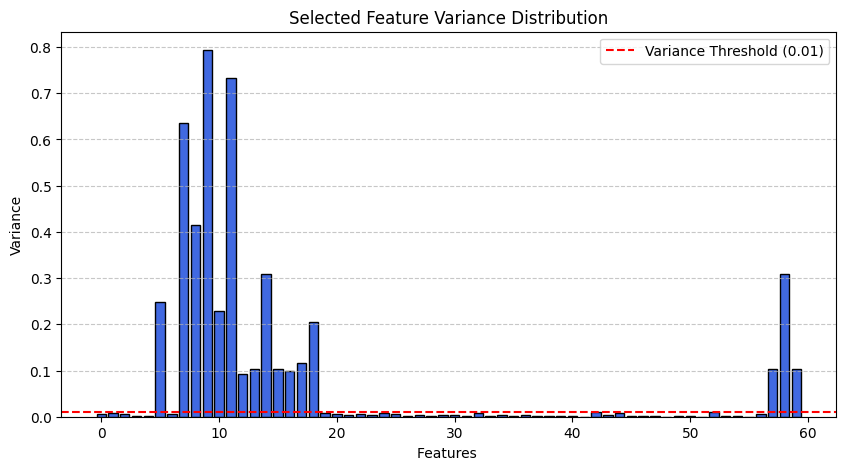

In [81]:
# apply VarianceThreshold to remove low-variance features (threshold=0.01 as an example)
selector = VarianceThreshold(threshold=0.01)
selector.fit(after_drop_unnecee_feat_var)

# get variance of each feature
variances = np.var(after_drop_unnecee_feat_var, axis=0)

# sort variances for better visualization
# sorted_variances = np.sort(variances)

# Plot variance of features
plt.figure(figsize=(10, 5))
plt.bar(range(len(variances)), variances, color='royalblue', edgecolor='black')
plt.axhline(y=0.01, color='red', linestyle='--', label='Variance Threshold (0.01)')
plt.title('Selected Feature Variance Distribution')
plt.xlabel('Features ')
plt.ylabel('Variance')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [84]:
after_drop_low_variance = after_drop_unnecee_feat.drop(low_variance_features_list, axis=1)
after_drop_low_variance

AGE3  SERVICE  MILSTAT  ACTDEVER  ACTD2001  ACTD9001  ACTD7590  \
0      10.0      2.0     99.0      99.0      99.0      99.0      99.0   
1       9.0      1.0      3.0       1.0       1.0       2.0       2.0   
2       9.0      2.0     99.0      99.0      99.0      99.0      99.0   
3       1.0     99.0     99.0      99.0      99.0      99.0      99.0   
4      10.0      2.0     99.0      99.0      99.0      99.0      99.0   
...     ...      ...      ...       ...       ...       ...       ...   
56700   9.0      2.0     99.0      99.0      99.0      99.0      99.0   
56701  11.0      2.0     99.0      99.0      99.0      99.0      99.0   
56702  10.0      2.0     99.0      99.0      99.0      99.0      99.0   
56703  11.0      1.0      3.0       1.0       2.0       2.0       2.0   
56704   3.0      2.0     99.0      99.0      99.0      99.0      99.0   

       ACTDVIET  ACTDPRIV  COMBATPY  NOMARR2  HEALTH  MOVSINPYR2  SEXATRACT2  \
0          99.0      99.0      99.0      1.0     2.0         0.0         1.0   
1           2.0       2.0       2.0     99.0     2.0         0.0         2.0   
2          99.0      99.0      99.0      2.0     3.0         0.0         2.0   
3          99.0      99.0      99.0     99.0     3.0         0.0         1.0   
4          99.0      99.0      99.0      1.0     1.0         0.0         1.0   
...         ...       ...       ...      ...     ...         ...         ...   
56700      99.0      99.0      99.0     99.0     4.0         0.0        98.0   
56701      99.0      99.0      99.0      1.0     2.0         0.0         1.0   
56702      99.0      99.0      99.0     99.0     2.0         0.0         1.0   
56703       1.0       2.0       2.0      1.0     2.0         0.0         1.0   
56704      99.0      99.0      99.0     99.0     3.0         2.0         6.0   

       SEXIDENT22  SPEAKENGL  LVLDIFSEE2  LVLDIFHEAR2  LVLDIFWALK2  \
0             1.0        1.0         1.0          1.0          1.0   
1             3.0        1.0         1.0          1.0          1.0   
2             1.0        1.0         2.0          3.0          1.0   
3             1.0        1.0         1.0          1.0          1.0   
4             1.0        1.0         1.0          1.0          1.0   
...           ...        ...         ...          ...          ...   
56700        98.0       98.0        98.0         98.0         98.0   
56701         1.0        1.0         1.0          1.0          1.0   
56702         1.0        1.0         2.0          1.0          1.0   
56703         1.0        1.0         1.0          1.0          1.0   
56704         6.0        3.0         3.0          3.0          3.0   

       LVLDIFMEM2  LVLDIFCARE2  LVLDIFCOMM2  IRSEX  IRMARIT  IIMARIT  \
0             1.0          1.0          1.0    1.0      1.0      1.0   
1             2.0          1.0          1.0    1.0      4.0      1.0   
2             2.0          1.0          1.0    2.0      1.0      1.0   
3             1.0          1.0          1.0    1.0     99.0      9.0   
4             1.0          1.0          1.0    1.0      1.0      1.0   
...           ...          ...          ...    ...      ...      ...   
56700        98.0         98.0         98.0    2.0      4.0      1.0   
56701         1.0          1.0          1.0    2.0      1.0      1.0   
56702         1.0          1.0          1.0    2.0      4.0      1.0   
56703         1.0          1.0          1.0    1.0      1.0      1.0   
56704         3.0          3.0          3.0    2.0      4.0      1.0   

       IREDUHIGHST2  CATAGE  CATAG2  CATAG3  CATAG6  CATAG7  PREGAGE2  \
0               9.0     4.0     3.0     5.0     5.0     7.0       4.0   
1               8.0     4.0     3.0     4.0     4.0     7.0       3.0   
2               8.0     4.0     3.0     4.0     4.0     7.0       4.0   
3               2.0     1.0     1.0     1.0     1.0     1.0       4.0   
4              11.0     4.0     3.0     5.0     5.0     7.0       4.0   
...             ...     .

In [ ]:
# missing value visualization

In [ ]:
# missing values visualization
# check the the col where it has more than 40 % of missing
threshold = 0.1 * len(after_drop_low_variance)
nan_columns = [col for col in after_drop_low_variance.columns if after_drop_low_variance[col].isna().sum() > threshold]
data_with_nan = after_drop_low_variance[nan_columns]
data_with_nan


UADCAR  UADHOME  UADOTHM  UADPUBL  UADBAR  UADEVNT  UADROTH  CIG1PACK  \
0         NaN      NaN      NaN      NaN     NaN      NaN      NaN       NaN   
1         NaN      NaN      NaN      NaN     NaN      NaN      NaN       NaN   
2         NaN      NaN      NaN      NaN     NaN      NaN      NaN       1.0   
3         NaN      NaN      NaN      NaN     NaN      NaN      NaN       NaN   
4         NaN      NaN      NaN      NaN     NaN      NaN      NaN       NaN   
...       ...      ...      ...      ...     ...      ...      ...       ...   
56700     NaN      NaN      NaN      NaN     NaN      NaN      NaN       NaN   
56701     NaN      NaN      NaN      NaN     NaN      NaN      NaN       NaN   
56702     NaN      NaN      NaN      NaN     NaN      NaN      NaN       NaN   
56703     NaN      NaN      NaN      NaN     NaN      NaN      NaN       NaN   
56704     NaN      NaN      NaN      NaN     NaN      NaN      NaN       NaN   

       CIGAVGD  CIGAVGM  ALCNUMDKPM  SRCPNRNM2  SRCTRQNM2  SRCSTMNM2  \
0          NaN      NaN        42.0        NaN        NaN        NaN   
1         10.5     52.5        30.0        NaN        NaN        NaN   
2         20.5    615.0         NaN        NaN        NaN        NaN   
3          NaN      NaN         NaN        NaN        NaN        NaN   
4          NaN      NaN         6.0        NaN        NaN        NaN   
...        ...      ...         ...        ...        ...        ...   
56700      NaN      NaN         NaN        NaN        NaN        NaN   
56701      NaN      NaN         1.0        NaN        NaN        NaN   
56702      NaN      NaN        54.0        NaN        NaN        NaN   
56703      NaN      NaN         NaN        NaN        NaN        NaN   
56704      NaN      NaN         NaN        NaN        NaN        NaN   

       SRCSEDNM2  SRCFRPNRNM  SRCFRTRQNM  SRCFRSTMNM  SRCFRSEDNM  SRCCLFRPNR  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
56700        NaN         NaN         NaN         NaN         NaN         NaN   
56701        NaN         NaN         NaN         NaN         NaN         NaN   
56702        NaN         NaN         NaN         NaN         NaN         NaN   
56703        NaN         NaN         NaN         NaN         NaN         NaN   
56704        NaN         NaN         NaN         NaN         NaN         NaN   

       SRCCLFRTRQ  SRCCLFRSTM  SRCCLFRSED  SUNTCOST  SUNTINSCV  SUNTENCV  \
0             NaN         NaN         NaN       NaN        NaN       NaN   
1             NaN         NaN         NaN       NaN        NaN       NaN   
2             NaN         NaN         NaN       NaN        NaN       NaN   
3             NaN         NaN         NaN       NaN        NaN       NaN   
4             NaN         NaN         NaN       NaN        NaN       NaN   
...           ...         ...         ...       ...        ...       ...   
56700         NaN         NaN         NaN       NaN        NaN       NaN   
56701         NaN         NaN         NaN       NaN        NaN       NaN   
56702         NaN         NaN         NaN       NaN        NaN       NaN   
56703         NaN         NaN         NaN       NaN        NaN       NaN   
56704         NaN         NaN         NaN       NaN        NaN       NaN   

       SUNTWHER  SUNTNOFND  SUNTNOOPN  SUNTPROBS  SUNTTIME  SUNTPRIV  \
0           NaN        NaN        NaN        NaN       NaN       NaN   
1           NaN        NaN        NaN        NaN       NaN       NaN   
2           NaN        NaN        NaN        NaN       NaN       NaN   
3           NaN    

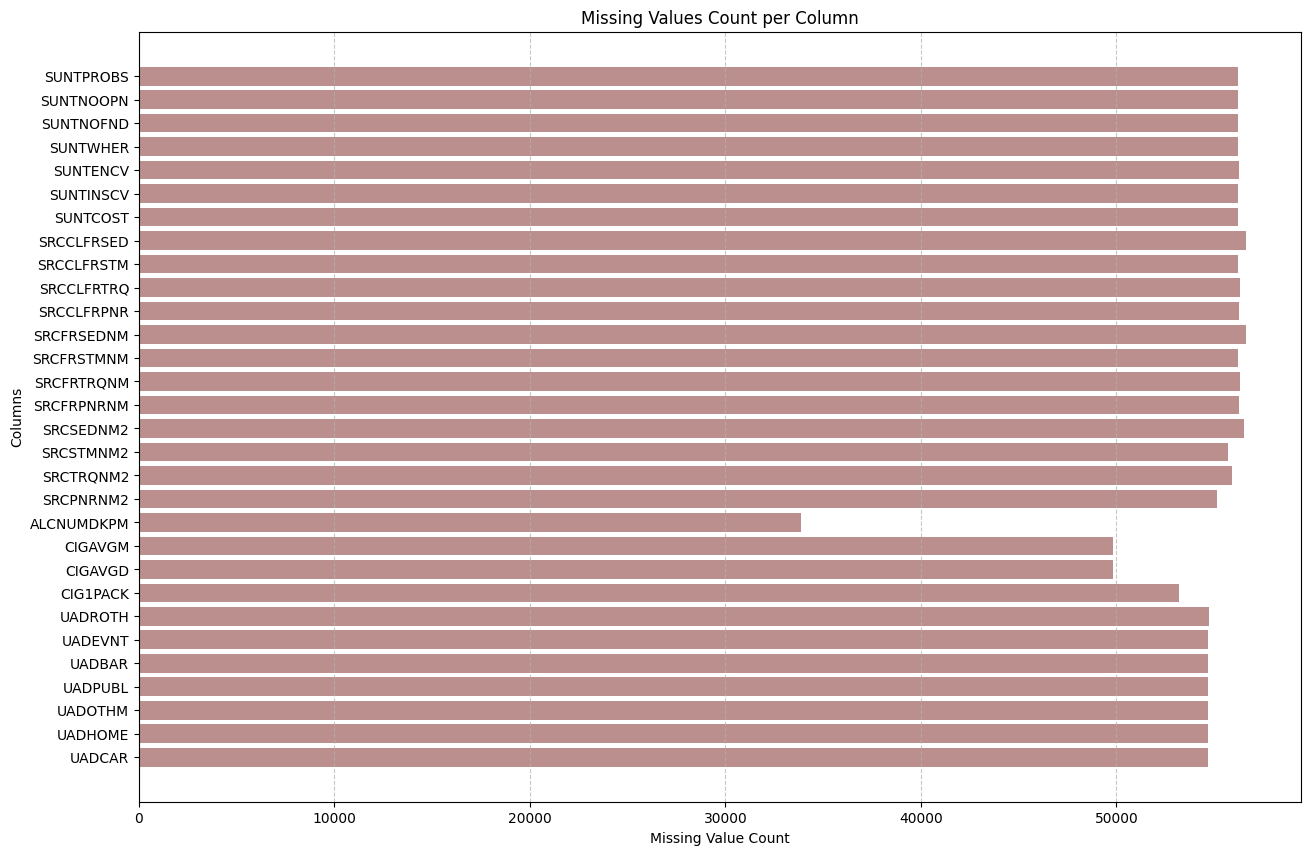

In [86]:
# count missing values for each column
missing_counts = data_with_nan.iloc[:,:30].isna().sum()
# Plot horizontal bar chart
plt.figure(figsize=(15, 10))
plt.barh(missing_counts.index, missing_counts.values, color='rosybrown')
# Labels and title
plt.xlabel("Missing Value Count")
plt.ylabel("Columns")
plt.title("Missing Values Count per Column")
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
# Show plot
plt.show()

In [91]:
## dropping nan data's 

after_dropping_nan = after_drop_low_variance.dropna(axis=1)
after_dropping_nan

AGE3  SERVICE  MILSTAT  ACTDEVER  ACTD2001  ACTD9001  ACTD7590  \
0      10.0      2.0     99.0      99.0      99.0      99.0      99.0   
1       9.0      1.0      3.0       1.0       1.0       2.0       2.0   
2       9.0      2.0     99.0      99.0      99.0      99.0      99.0   
3       1.0     99.0     99.0      99.0      99.0      99.0      99.0   
4      10.0      2.0     99.0      99.0      99.0      99.0      99.0   
...     ...      ...      ...       ...       ...       ...       ...   
56700   9.0      2.0     99.0      99.0      99.0      99.0      99.0   
56701  11.0      2.0     99.0      99.0      99.0      99.0      99.0   
56702  10.0      2.0     99.0      99.0      99.0      99.0      99.0   
56703  11.0      1.0      3.0       1.0       2.0       2.0       2.0   
56704   3.0      2.0     99.0      99.0      99.0      99.0      99.0   

       ACTDVIET  ACTDPRIV  COMBATPY  NOMARR2  HEALTH  MOVSINPYR2  SEXATRACT2  \
0          99.0      99.0      99.0      1.0     2.0         0.0         1.0   
1           2.0       2.0       2.0     99.0     2.0         0.0         2.0   
2          99.0      99.0      99.0      2.0     3.0         0.0         2.0   
3          99.0      99.0      99.0     99.0     3.0         0.0         1.0   
4          99.0      99.0      99.0      1.0     1.0         0.0         1.0   
...         ...       ...       ...      ...     ...         ...         ...   
56700      99.0      99.0      99.0     99.0     4.0         0.0        98.0   
56701      99.0      99.0      99.0      1.0     2.0         0.0         1.0   
56702      99.0      99.0      99.0     99.0     2.0         0.0         1.0   
56703       1.0       2.0       2.0      1.0     2.0         0.0         1.0   
56704      99.0      99.0      99.0     99.0     3.0         2.0         6.0   

       SEXIDENT22  SPEAKENGL  LVLDIFSEE2  LVLDIFHEAR2  LVLDIFWALK2  \
0             1.0        1.0         1.0          1.0          1.0   
1             3.0        1.0         1.0          1.0          1.0   
2             1.0        1.0         2.0          3.0          1.0   
3             1.0        1.0         1.0          1.0          1.0   
4             1.0        1.0         1.0          1.0          1.0   
...           ...        ...         ...          ...          ...   
56700        98.0       98.0        98.0         98.0         98.0   
56701         1.0        1.0         1.0          1.0          1.0   
56702         1.0        1.0         2.0          1.0          1.0   
56703         1.0        1.0         1.0          1.0          1.0   
56704         6.0        3.0         3.0          3.0          3.0   

       LVLDIFMEM2  LVLDIFCARE2  LVLDIFCOMM2  IRSEX  IRMARIT  IIMARIT  \
0             1.0          1.0          1.0    1.0      1.0      1.0   
1             2.0          1.0          1.0    1.0      4.0      1.0   
2             2.0          1.0          1.0    2.0      1.0      1.0   
3             1.0          1.0          1.0    1.0     99.0      9.0   
4             1.0          1.0          1.0    1.0      1.0      1.0   
...           ...          ...          ...    ...      ...      ...   
56700        98.0         98.0         98.0    2.0      4.0      1.0   
56701         1.0          1.0          1.0    2.0      1.0      1.0   
56702         1.0          1.0          1.0    2.0      4.0      1.0   
56703         1.0          1.0          1.0    1.0      1.0      1.0   
56704         3.0          3.0          3.0    2.0      4.0      1.0   

       IREDUHIGHST2  CATAGE  CATAG2  CATAG3  CATAG6  CATAG7  PREGAGE2  \
0               9.0     4.0     3.0     5.0     5.0     7.0       4.0   
1               8.0     4.0     3.0     4.0     4.0     7.0       3.0   
2               8.0     4.0     3.0     4.0     4.0     7.0       4.0   
3               2.0     1.0     1.0     1.0     1.0     1.0       4.0   
4              11.0     4.0     3.0     5.0     5.0     7.0       4.0   
...             ...     .

In [87]:
# reading correlation info 

corr_info = pd.read_csv('corr_noncorr_info.csv')
corr_info

NON_CORRELATED CORRELATED95 COLUMNS_WITH_NAN
0               AGE3     ACTDEVER           UADCAR
1            SERVICE     ACTD9001          UADHOME
2            MILSTAT     ACTD7590          UADOTHM
3           ACTD2001     ACTDVIET          UADPUBL
4            NOMARR2     ACTDPRIV           UADBAR
...              ...          ...              ...
56700            NaN          NaN              NaN
56701            NaN          NaN              NaN
56702            NaN          NaN              NaN
56703            NaN          NaN              NaN
56704            NaN          NaN              NaN

[56705 rows x 3 columns]

In [ ]:
correlate_95 = corr_info['CORRELATED95'].dropna()
correlate_95_list = correlate_95.to_list()
correlate_95_list

['ACTDEVER',
 'ACTD9001',
 'ACTD7590',
 'ACTDVIET',
 'ACTDPRIV',
 'COMBATPY',
 'LVLDIFWALK2',
 'LVLDIFMEM2',
 'LVLDIFCARE2',
 'LVLDIFCOMM2',
 'IIMARIT',
 'CATAGE',
 'CATAG3',
 'CATAG6',
 'CATAG7',
 'SEXAGE',
 'EDUFULPAR',
 'EDUSCKCOM',
 'EDUSKPMON',
 'EDUSKPCOM',
 'MILTPARNT',
 'MILTCHLDR',
 'MILTSIBLN',
 'ENRLCOLLST2',
 'WRKDPSTWK',
 'WRKDPSTYR',
 'WRKNUMJOB2',
 'WRKNJBPYR',
 'WRKSICKMO',
 'WRKSKIPMO',
 'WRKDRGPOL',
 'WRKDRGEDU',
 'WRKDRGHLP',
 'WRKTSTALC',
 'WRKTSTDRG',
 'WRKTSTRDM',
 'WRKTST1ST',
 'WRKOKPREH',
 'WRKOKRAND',
 'IRWRKSTAT',
 'IIWRKSTAT',
 'II2WRKSTAT',
 'IIWRKSTAT18',
 'II2WRKST18',
 'IMOTHER',
 'IFATHER',
 'IIHH65_2',
 'HLTINDRG',
 'HLNVOFFR',
 'HLNVREF',
 'HLNVNEED',
 'HLNVSOR',
 'IIMEDICR',
 'IIMCDCHP',
 'IICHMPUS',
 'IRPRVHLT',
 'IIPRVHLT',
 'IROTHHLT',
 'HLCALL99',
 'IRINSUR4',
 'IIINSUR4',
 'CELLNOTCL',
 'INCOME',
 'BKLARCNY',
 'BKBURGL',
 'BKSRVIOL',
 'BKSMASLT',
 'BKROB',
 'BKARSON',
 'BKDRVINF',
 'BKDRUNK',
 'BKDRUG',
 'BKSEXNR',
 'BKFRAUD',
 'BKOTH',
 'CIGTRY

In [96]:
drop_some_feat = ['IIPIPLF', 'II2CRKRC', 'II2HERRC', 'II2PCPRC', 'COCMON', 'CRKYR', 'CRKMON', 'HERYR', 'HERMON', 'INHALMON', 'METHAMYR', 'METHAMMON', 'PNRNMMON', 'OXYCNNMYR', 'TRQNMMON', 'STMNMMON', 'SEDNMYR', 'SEDNMMON', 'SEDNDAYPM', 'GHBFLAG', 'SYNSTMFLAG', 'IMFFLAG', 'OPIIMFNMMN']
filtered_features = [f for f in correlate_95_list if f not in drop_some_feat]
filtered_features


['ACTDEVER',
 'ACTD9001',
 'ACTD7590',
 'ACTDVIET',
 'ACTDPRIV',
 'COMBATPY',
 'LVLDIFWALK2',
 'LVLDIFMEM2',
 'LVLDIFCARE2',
 'LVLDIFCOMM2',
 'IIMARIT',
 'CATAGE',
 'CATAG3',
 'CATAG6',
 'CATAG7',
 'SEXAGE',
 'EDUFULPAR',
 'EDUSCKCOM',
 'EDUSKPMON',
 'EDUSKPCOM',
 'MILTPARNT',
 'MILTCHLDR',
 'MILTSIBLN',
 'ENRLCOLLST2',
 'WRKDPSTWK',
 'WRKDPSTYR',
 'WRKNUMJOB2',
 'WRKNJBPYR',
 'WRKSICKMO',
 'WRKSKIPMO',
 'WRKDRGPOL',
 'WRKDRGEDU',
 'WRKDRGHLP',
 'WRKTSTALC',
 'WRKTSTDRG',
 'WRKTSTRDM',
 'WRKTST1ST',
 'WRKOKPREH',
 'WRKOKRAND',
 'IRWRKSTAT',
 'IIWRKSTAT',
 'II2WRKSTAT',
 'IIWRKSTAT18',
 'II2WRKST18',
 'IMOTHER',
 'IFATHER',
 'IIHH65_2',
 'HLTINDRG',
 'HLNVOFFR',
 'HLNVREF',
 'HLNVNEED',
 'HLNVSOR',
 'IIMEDICR',
 'IIMCDCHP',
 'IICHMPUS',
 'IRPRVHLT',
 'IIPRVHLT',
 'IROTHHLT',
 'HLCALL99',
 'IRINSUR4',
 'IIINSUR4',
 'CELLNOTCL',
 'INCOME',
 'BKLARCNY',
 'BKBURGL',
 'BKSRVIOL',
 'BKSMASLT',
 'BKROB',
 'BKARSON',
 'BKDRVINF',
 'BKDRUNK',
 'BKDRUG',
 'BKSEXNR',
 'BKFRAUD',
 'BKOTH',
 'CIGTRY

In [97]:
# corr_analysis_data = after_dropping_nan.drop(drop_some_feat, axis=1)
corr_analysis_data = after_dropping_nan[filtered_features]
corr_analysis_data

ACTDEVER  ACTD9001  ACTD7590  ACTDVIET  ACTDPRIV  COMBATPY  \
0          99.0      99.0      99.0      99.0      99.0      99.0   
1           1.0       2.0       2.0       2.0       2.0       2.0   
2          99.0      99.0      99.0      99.0      99.0      99.0   
3          99.0      99.0      99.0      99.0      99.0      99.0   
4          99.0      99.0      99.0      99.0      99.0      99.0   
...         ...       ...       ...       ...       ...       ...   
56700      99.0      99.0      99.0      99.0      99.0      99.0   
56701      99.0      99.0      99.0      99.0      99.0      99.0   
56702      99.0      99.0      99.0      99.0      99.0      99.0   
56703       1.0       2.0       2.0       1.0       2.0       2.0   
56704      99.0      99.0      99.0      99.0      99.0      99.0   

       LVLDIFWALK2  LVLDIFMEM2  LVLDIFCARE2  LVLDIFCOMM2  IIMARIT  CATAGE  \
0              1.0         1.0          1.0          1.0      1.0     4.0   
1              1.0         2.0          1.0          1.0      1.0     4.0   
2              1.0         2.0          1.0          1.0      1.0     4.0   
3              1.0         1.0          1.0          1.0      9.0     1.0   
4              1.0         1.0          1.0          1.0      1.0     4.0   
...            ...         ...          ...          ...      ...     ...   
56700         98.0        98.0         98.0         98.0      1.0     4.0   
56701          1.0         1.0          1.0          1.0      1.0     4.0   
56702          1.0         1.0          1.0          1.0      1.0     4.0   
56703          1.0         1.0          1.0          1.0      1.0     4.0   
56704          3.0         3.0          3.0          3.0      1.0     1.0   

       CATAG3  CATAG6  CATAG7  SEXAGE  EDUFULPAR  EDUSCKCOM  EDUSKPMON  \
0         5.0     5.0     7.0     5.0       99.0       99.0       99.0   
1         4.0     4.0     7.0     5.0       99.0       99.0       99.0   
2         4.0     4.0     7.0     5.0       99.0       99.0       99.0   
3         1.0     1.0     1.0     1.0        1.0        4.0        0.0   
4         5.0     5.0     7.0     5.0       99.0       99.0       99.0   
...       ...     ...     ...     ...        ...        ...        ...   
56700     4.0     4.0     7.0     5.0       98.0       98.0       98.0   
56701     5.0     6.0     7.0     5.0       99.0       99.0       99.0   
56702     5.0     5.0     7.0     5.0       99.0       99.0       99.0   
56703     5.0     6.0     7.0     5.0       98.0       98.0       98.0   
56704     1.0     1.0     3.0     2.0        1.0       12.0        1.0   

       EDUSKPCOM  MILTPARNT  MILTCHLDR  MILTSIBLN  ENRLCOLLST2  WRKDPSTWK  \
0           99.0       99.0       99.0       99.0          5.0        2.0   
1           99.0        2.0        2.0        1.0          5.0        1.0   
2           99.0       99.0       99.0       99.0          5.0        2.0   
3            0.0       97.0       97.0       97.0          5.0       99.0   
4           99.0       99.0       99.0       99.0          5.0        1.0   
...          ...        ...        ...        ...          ...        ...   
56700       98.0       98.0       98.0       98.0          5.0       98.0   
56701       99.0       99.0       99.0       99.0          5.0        2.0   
56702       99.0       99.0       99.0       99.0          5.0        1.0   
56703       98.0       99.0       99.0       99.0          5.0        2.0   
56704        1.0       99.0       99.0       99.0          5.0        2.0   

       WRKDPSTYR  WRKNUMJOB2  WRKNJBPYR  WRKSICKMO  WRKSKIPMO  WRKDRGPOL  \
0            2.0        99.0       99.0       99.0       99.0       99.0   
1           99.0         1.0        2.0        0.0        0.0        2.0   
2            2.0        99.0       99.0       99.0       99.0       99.0   
3           99.0        99.0       99.0       99.0       99.0       99.0   
4           99.0         1.0        2.0        0.0        0

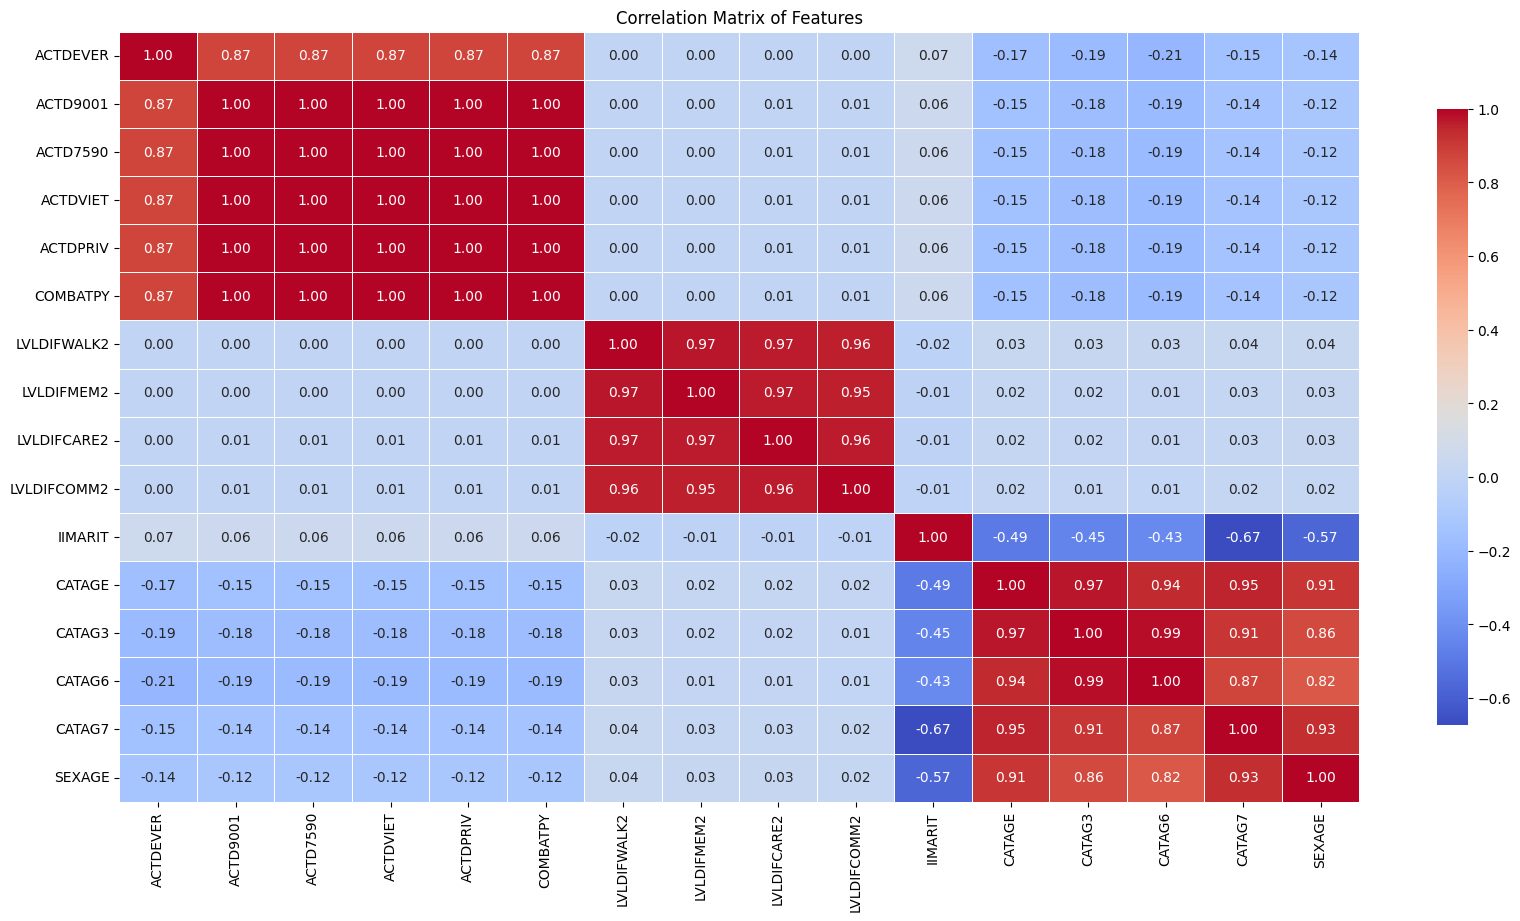

In [ ]:
# slicing 16 features for visualization
correlated_data_sliced = corr_analysis_data.iloc[:,:16]
correlation_matrix = correlated_data_sliced.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')
plt.show()

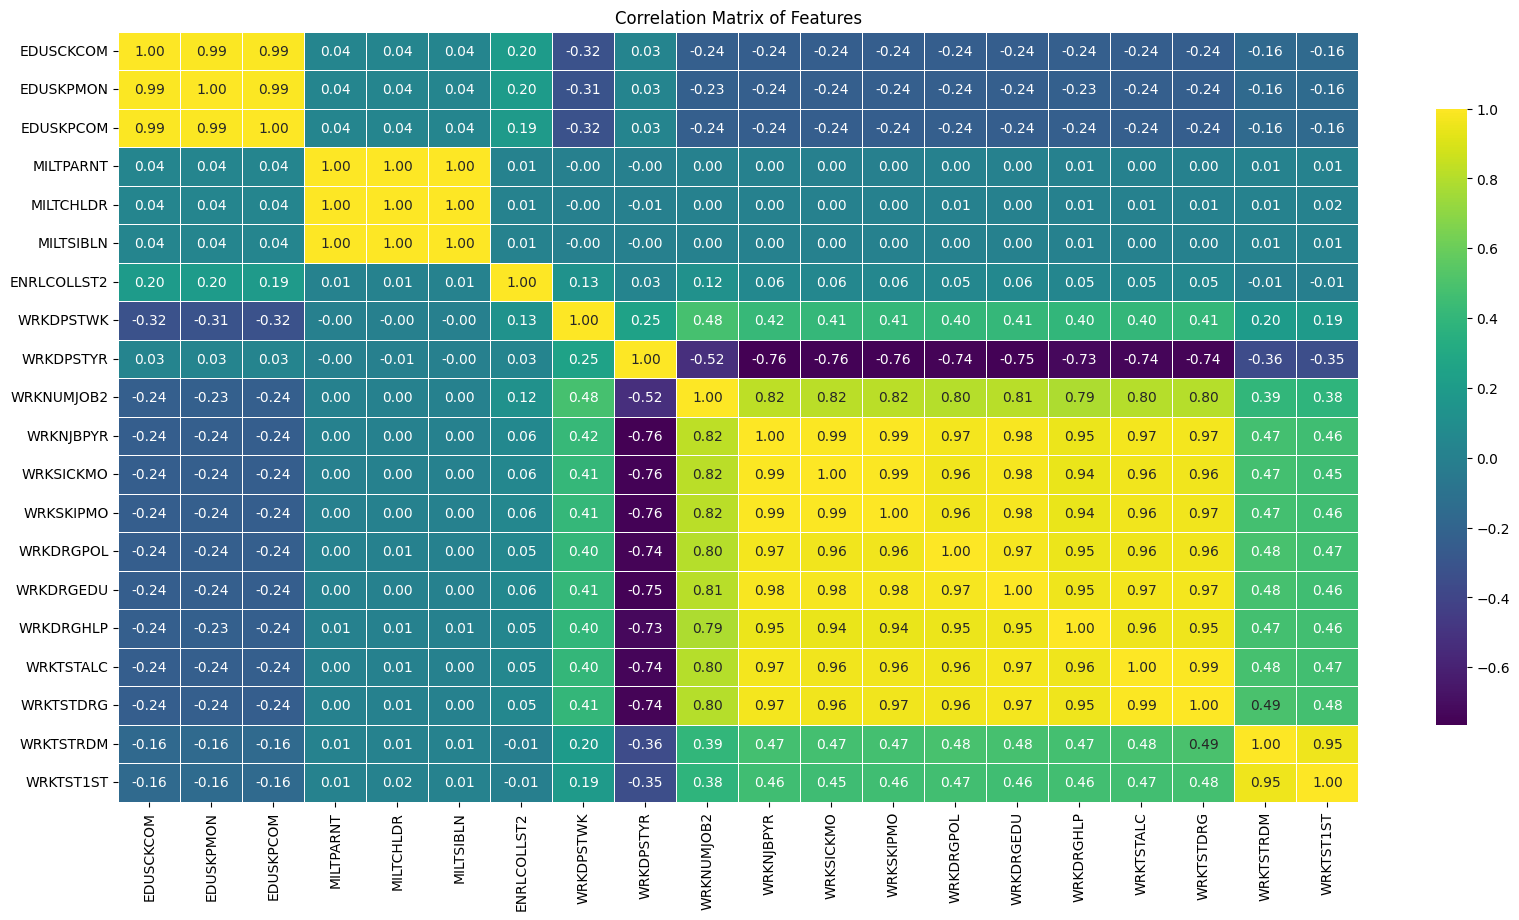

In [100]:
# slicing the next 16 to 18 features
correlated_data_sliced = corr_analysis_data.iloc[:,17:37]
correlation_matrix = correlated_data_sliced.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features')
plt.show()

In [101]:
# visualiziing features before and after the above cleaning and correlation analysis

data_2023_preprocessed = pd.read_csv('data_2023_preprocessed.csv')
data_2023_preprocessed

AGE3  HEALTH  MOVSINPYR2  IRSEX  IRMARIT  IREDUHIGHST2  IIEDUHIGHST2  \
0      10.0     2.0         0.0    1.0      1.0           9.0           1.0   
1       9.0     2.0         0.0    1.0      4.0           8.0           1.0   
2       9.0     3.0         0.0    2.0      1.0           8.0           1.0   
3      10.0     1.0         0.0    1.0      1.0          11.0           1.0   
4       4.0     3.0         0.0    1.0      4.0           8.0           1.0   
...     ...     ...         ...    ...      ...           ...           ...   
51039   9.0     4.0         0.0    2.0      4.0           1.0           1.0   
51040  11.0     2.0         0.0    2.0      1.0          10.0           1.0   
51041  10.0     2.0         0.0    2.0      4.0          11.0           1.0   
51042  11.0     2.0         0.0    1.0      1.0          11.0           1.0   
51043   3.0     3.0         2.0    2.0      4.0           7.0           1.0   

       PREGAGE2  DRVINAGE  NEWRACE2  EDUHIGHCAT  EDUSCHLGO  ENRLCOLLFT2  \
0           4.0       2.0       7.0         3.0        2.0          3.0   
1           3.0       2.0       1.0         2.0        2.0          3.0   
2           4.0       2.0       4.0         2.0        2.0          3.0   
3           4.0       2.0       6.0         4.0        2.0          3.0   
4           2.0       1.0       1.0         2.0        2.0          2.0   
...         ...       ...       ...         ...        ...          ...   
51039       3.0       2.0       7.0         1.0       98.0          3.0   
51040       4.0       2.0       1.0         3.0        2.0          3.0   
51041       4.0       2.0       1.0         4.0        2.0          3.0   
51042       4.0       2.0       5.0         4.0       94.0          3.0   
51043       1.0       1.0       6.0         5.0        1.0          3.0   

       IRHHSIZ2  IRKI17_2  IRHH65_2  HLCNOTYR  IRMEDICR  IRMCDCHP  IRCHMPUS  \
0           3.0       1.0       1.0       2.0       2.0       2.0       2.0   
1           3.0       1.0       2.0      99.0       2.0       2.0       2.0   
2           3.0       1.0       2.0       2.0       2.0       1.0       2.0   
3           3.0       1.0       2.0       2.0       2.0       2.0       2.0   
4           6.0       1.0       2.0       2.0       2.0       2.0       2.0   
...         ...       ...       ...       ...       ...       ...       ...   
51039       4.0       3.0       1.0      98.0       2.0       1.0       2.0   
51040       4.0       1.0       3.0       2.0       1.0       2.0       2.0   
51041       1.0       1.0       1.0       2.0       2.0       2.0       2.0   
51042       2.0       1.0       3.0       2.0       1.0       2.0       2.0   
51043       2.0       2.0       1.0      99.0       2.0       2.0       2.0   

       HLCALLFG  OTHINS  IRFAMSOC  IIFAMSOC  IRFAMSSI  IRFSTAMP  IRFAMPMT  \
0          98.0     2.0       2.0       1.0       2.0       2.0       2.0   
1          98.0     2.0       2.0       1.0       2.0       2.0       2.0   
2          98.0     2.0       1.0       1.0       1.0       1.0       2.0   
3          98.0     2.0       1.0       1.0       2.0       2.0       2.0   
4          98.0     2.0       2.0       1.0       2.0       2.0       2.0   
...         ...     ...       ...       ...       ...       ...       ...   
51039      98.0     2.0       2.0       3.0       2.0       1.0       2.0   
51040      98.0     1.0       2.0       1.0       2.0       1.0       2.0   
51041      98.0     2.0       2.0       1.0       2.0       2.0       2.0   
51042      98.0     1.0       1.0       1.0       2.0       2.0       2.0   
51043      98.0     2.0       2.0       1.0       2.0       2.0       2.0   

       IRFAMSVC  IIWELMOS  IRPINC3  IIPINC3  IRFAMIN3  IIFAMIN3  BOOKED  \
0           2.0       9.0      6.0      1.0       6.0       1.0     2.0   
1           2.0       9.0      1.0      1.0       7.0       1.0     2.0   
2           2.0       9.0      1.0      1.0       1.0     

In [ ]:
data_after_all_cleaning_stage = data_2023_preprocessed.shape  # saved last week after the cleaning, correlation and all that 
data_before_all_cleaning_stage = after_dropping_nan.copy().shape
data_before_all_cleaning_stage

(56705, 2088)

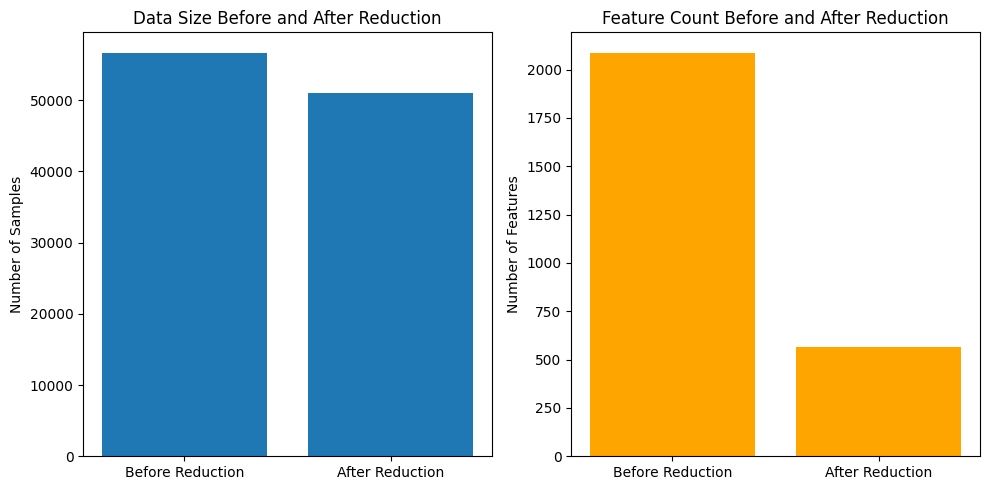

In [107]:
# visualizing the feature and data size before and after the processins stages

categories = ["Before Reduction", "After Reduction"]
num_samples = [data_before_all_cleaning_stage[0], data_after_all_cleaning_stage[0]]
num_features = [data_before_all_cleaning_stage[1], data_after_all_cleaning_stage[1]]

# create bar plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(categories, num_samples)
plt.ylabel("Number of Samples")
plt.title("Data Size Before and After Reduction")
plt.subplot(1, 2, 2)
plt.bar(categories, num_features, color='orange')
plt.ylabel("Number of Features")
plt.title("Feature Count Before and After Reduction")
plt.tight_layout()
plt.show()
